In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('features.csv')
df1 = pd.read_csv('train (2).csv')

In [3]:
merge_df=pd.merge(df,df1, on=['Store','Date'], how='inner')
merge_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,False


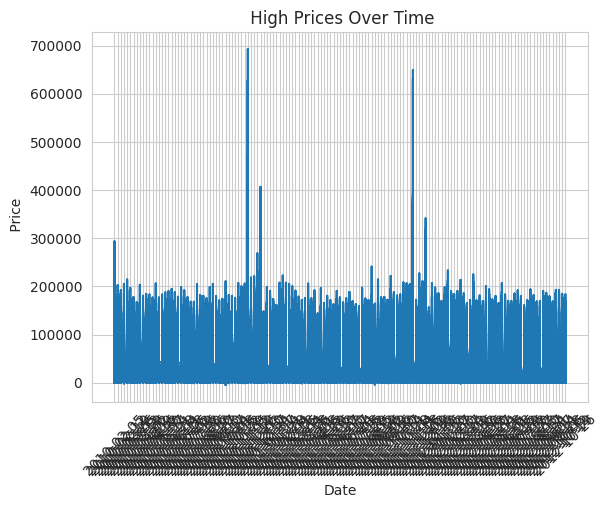

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the High prices
plt.plot(merge_df['Date'] ,merge_df['Weekly_Sales'])
plt.title(" High Prices Over Time")
plt.xlabel("Date")
plt.ylabel(" Price")
#plt.xticks([])
plt.xticks(rotation=45)
plt.savefig('High price')
plt.show()

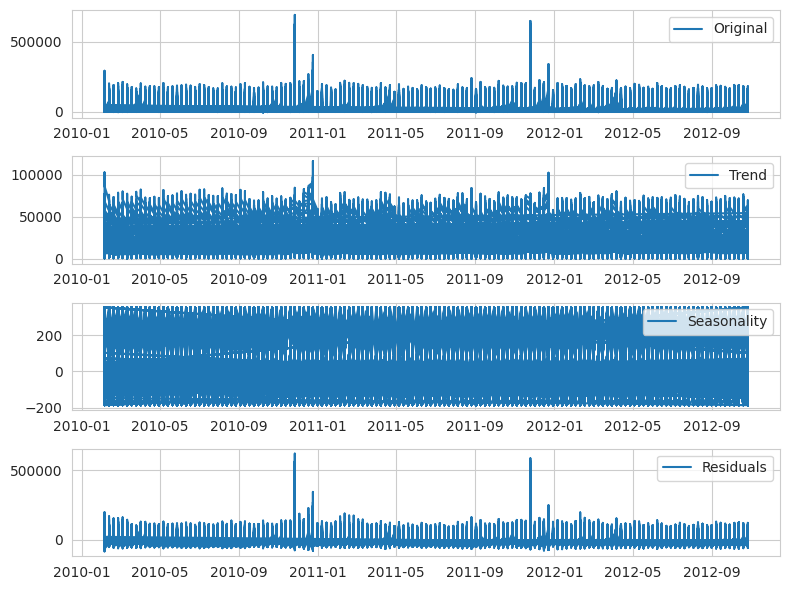

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
merge_df['Date'] = pd.to_datetime(merge_df['Date'])
merge_df.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(merge_df['Weekly_Sales'], period=12)

# Plot the trend, seasonal, and residual components
plt.figure(figsize=(8, 6))
plt.subplot(411)
plt.plot(merge_df['Weekly_Sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

# Adjust subplot spacing
plt.tight_layout()
plt.savefig('component of time series anaysis')
# Display the plot
plt.show()

In [6]:
rollmean = merge_df.rolling(window=12).mean()
rolstd = merge_df.rolling(window=12).std()
print(rollmean,rolstd)

            Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2010-02-05    NaN          NaN         NaN        NaN        NaN        NaN   
2010-02-05    NaN          NaN         NaN        NaN        NaN        NaN   
2010-02-05    NaN          NaN         NaN        NaN        NaN        NaN   
2010-02-05    NaN          NaN         NaN        NaN        NaN        NaN   
2010-02-05    NaN          NaN         NaN        NaN        NaN        NaN   
...           ...          ...         ...        ...        ...        ...   
2012-10-26   45.0        58.85       3.882    4018.91      58.08      100.0   
2012-10-26   45.0        58.85       3.882    4018.91      58.08      100.0   
2012-10-26   45.0        58.85       3.882    4018.91      58.08      100.0   
2012-10-26   45.0        58.85       3.882    4018.91      58.08      100.0   
2012-10-26   45.0        58.85       3.882    4018.9

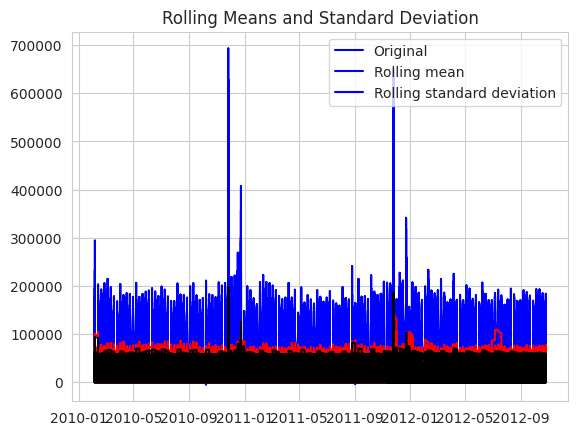

In [7]:
import matplotlib.pyplot as plt
orig = plt.plot(merge_df, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling mean')

std = plt.plot(rolstd, color='black', label='Rolling standard deviation')

plt.legend(['Original', 'Rolling mean', 'Rolling standard deviation'], loc='best')

# Adding title
plt.title('Rolling Means and Standard Deviation')
plt.savefig('Rolling Means and Standard Deviation')
# Displaying the plot
plt.show()

In [8]:
## Here 12 indicate moving average of 48 months and shift(1) that takes parameter 1 specify 12 months should start from last month
merge_df['mavg_12'] = merge_df['Weekly_Sales'].rolling(window=14).mean().shift(1)

In [9]:
## printing forecasting from 49 month
pd.set_option('display.float_format',lambda x: '%.4f' %x)
merge_df[['Weekly_Sales','mavg_12']][24:]

,Weekly_Sales,mavg_12
Date,,
2010-02-05,11737.1200,13986.5271
2010-02-05,2293.0000,13095.3800
2010-02-05,1085.2900,12655.6271
2010-02-05,7024.9500,9735.3414
2010-02-05,5491.0000,8846.6300
...,...,...
2012-10-26,2487.8000,14712.3100
2012-10-26,5203.3100,14477.7179
2012-10-26,56017.4700,14650.1414


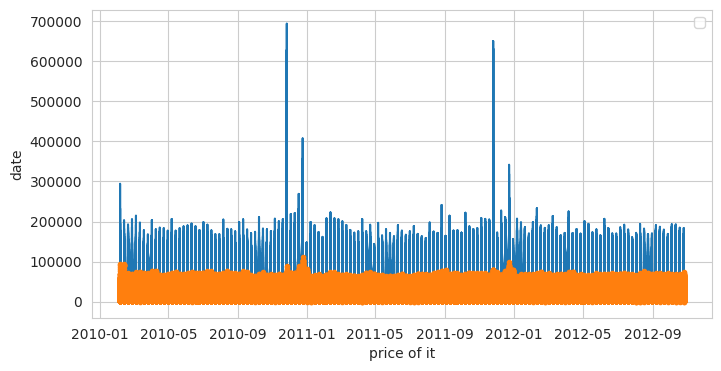

In [10]:
plt.figure(figsize=(8,4))
plt.ylabel('date')
plt.xlabel('price of it')
plt.plot(merge_df['Weekly_Sales'][24:]);
plt.plot(merge_df['mavg_12'][24:],'.');
plt.legend();

In [11]:
import numpy as np
def get_mape(actual,predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round(np.mean(np.abs((actual-predicted)/actual))*100,2)

In [12]:
get_mape(merge_df['mavg_12'][24:].values,merge_df['Weekly_Sales'][24:].values)

120.85

In [13]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(merge_df['mavg_12'][24:].values,merge_df['Weekly_Sales'][24:].values))

21674.625151331962

## exponential smoothing

In [14]:
# Create a new DataFrame 'gold_data2' and copy values from 'gold_data'
data2 = merge_df.copy()

# Now you can perform operations on 'gold_data2' without affecting 'gold_data'
data2['ewm'] = data2['Weekly_Sales'].ewm(alpha=0.2).mean()

In [15]:
pd.options.display.float_format = '{:.2f}'.format

In [16]:
get_mape(data2['ewm'][24:].values,data2['Weekly_Sales'][24:].values)

66.42

In [17]:
np.sqrt(mean_squared_error(data2['ewm'][24:].values,data2['Weekly_Sales'][24:].values))

16627.926856610386

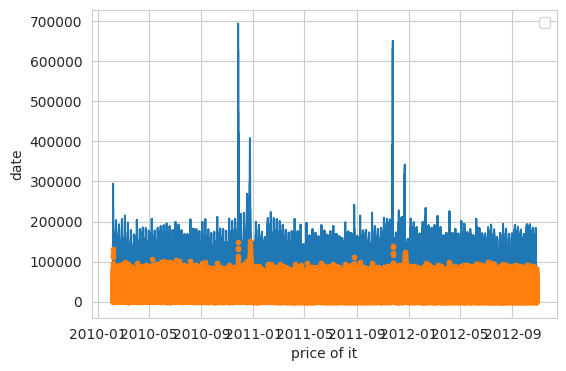

In [18]:
plt.figure(figsize=(6,4))
plt.ylabel('date')
plt.xlabel('price of it')
plt.plot(data2['Weekly_Sales'][24:]);
plt.plot(data2['ewm'][24:],'.');
plt.legend();